                   duration(minutes)     MS407     MS423
duration(minutes)           1.000000  0.724581  0.647756
MS407                       0.724581  1.000000  0.942084
MS423                       0.647756  0.942084  1.000000


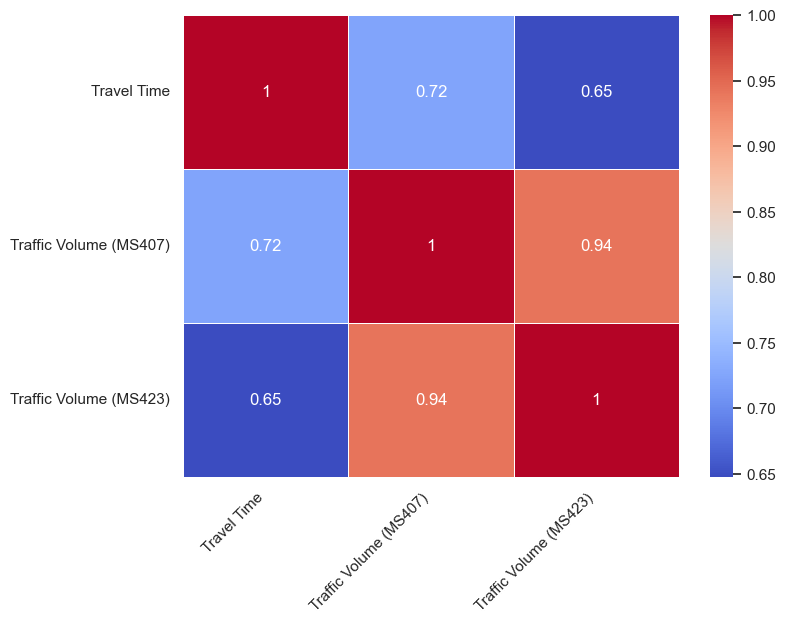

In [25]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Traffic_data2.csv')

# Calculate correlation coeffiecients for the traffic variables
correlation_matrix = df[['duration(minutes)', 'MS407', 'MS423']].corr()

# Display in table format
print(correlation_matrix)

# Save in a csv file
correlation_matrix.to_csv('correlation_matrix.csv', index=False)

# Create a heatmap 
plt.figure(figsize=(8, 6)) 
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Define axis labels
custom_labels = ['Travel Time', 'Traffic Volume (MS407)', 'Traffic Volume (MS423)']

# Set x-axis and y-axis labels
heatmap.set_xticklabels(custom_labels, rotation=45, ha='right')
heatmap.set_yticklabels(custom_labels, rotation=0)

# Save the plot as an image 
plt.savefig('correlationheatmap.png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()

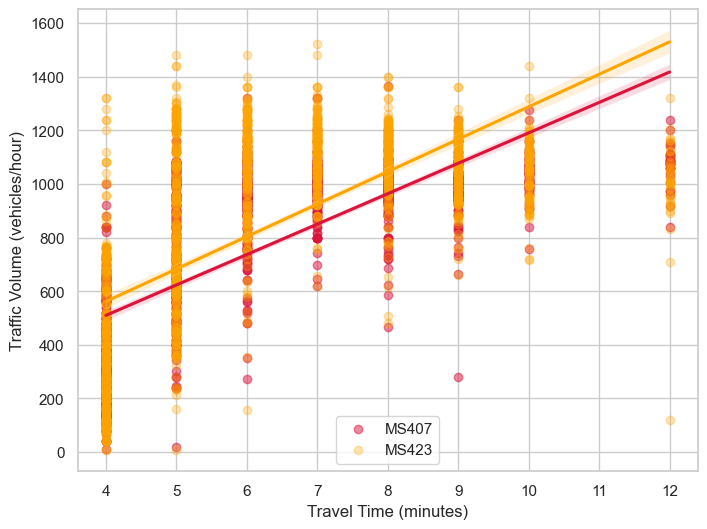

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot with regression lines and transparency
plt.figure(figsize=(8, 6))

# Scatterplot for Tavel Time vs Traffic Volume (MS407)
sns.regplot(data=df, x='duration(minutes)', y='MS407', color='crimson',label='MS407', scatter_kws={'alpha':0.5})

# Scatterplot for Travel Time vs Traffic Volume (MS423)
sns.regplot(data=df, x='duration(minutes)', y='MS423', color='orange', label='MS423', scatter_kws={'alpha':0.3})
plt.xlabel('Travel Time (minutes)')
plt.ylabel('Traffic Volume (vehicles/hour)')
plt.legend()  

# Save the plot as an image
plt.savefig('scatterplotcorrelation.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [49]:
import pandas as pd

# Load the dataset 
df = pd.read_csv('Traffic_data2.csv')

# Select only the relevant columns and drop rows with missing values
columns = ['duration(minutes)', 'avg_traffic']
df = df[columns]  # Keep only the specified columns
df = df.dropna()  # Remove any rows with NaN values in the selected columns

# Pivot the DataFrame to reshape it:
pivoted_df = df.pivot(index=None, columns='duration(minutes)', values='avg_traffic')

# Reset the index to default integer index 
pivoted_df.reset_index(drop=True, inplace=True)

# Count the number of non-NaN values in each column of the pivoted DataFrame
non_nan_counts = pivoted_df.count()

# Print the counts of non-NaN values for each column 
print("Non-NaN Counts for Each Column:")
print(non_nan_counts)

# Calculate descriptive statistics for each column in the pivoted DataFrame
# Ignoring NaN values in the calculations
median = pivoted_df.median()  # Calculate the median for each column
mean = pivoted_df.mean()  # Calculate the mean for each column
mode = pivoted_df.mode().iloc[0]  # Calculate the mode (most frequent value) and take the first mode if there are multiple
std_dev = pivoted_df.std()  # Calculate the standard deviation for each column

# Create a DataFrame to store the calculated statistics
statistics_df = pd.DataFrame({
    'Median': median, 
    'Mean': mean,  
    'Mode': mode,  
    'Standard Deviation': std_dev  
})

# Print the DataFrame 
print(statistics_df)

# Save the non-NaN counts to an Excel file 
non_nan_counts.to_excel('Non_NaN_Counts.xlsx', index=False)

# Save the statistics DataFrame to an Excel file
statistics_df.to_excel('Statistics.xlsx', index=False)

Non-NaN Counts for Each Column:
duration(minutes)
4.0     496
5.0     295
6.0     279
7.0     249
8.0     220
9.0     177
10.0     96
12.0     36
dtype: int64
                    Median         Mean    Mode  Standard Deviation
duration(minutes)                                                  
4.0                 280.75   334.172379   120.0          213.049309
5.0                 737.50   780.123729   560.0          263.853777
6.0                1031.00  1000.729391  1080.0          153.001532
7.0                1063.00  1054.403614  1080.0           82.152094
8.0                1057.75  1036.738636  1000.0           96.470232
9.0                1041.50  1032.033898  1080.0           83.235233
10.0               1040.00  1042.260417  1040.0           69.132519
12.0               1045.25  1034.416667  1136.5          119.576126


In [54]:
# Define Z-score thresholds
z_thresholds = [1, 2, 3]

# Initialize dictionaries to store results
z_scores_dict = {}  # For storing Z-scores
z_score_counts_dict = {}  # For storing counts of values exceeding each threshold

# Iterate over each column in the pivoted DataFrame
for column in pivoted_df.columns:
    column_data = pivoted_df[column]
    
    # Calculate Z-scores
    mean = column_data.mean()
    std_dev = column_data.std()
    z_scores = (column_data - mean) / std_dev
    
    # Store Z-scores in dictionary
    z_scores_dict[column] = z_scores
    
    # Calculate counts of values exceeding Z-score thresholds
    abs_z_scores = abs(z_scores)
    counts = {f'|Z|>{threshold}': (abs_z_scores > threshold).sum() for threshold in z_thresholds}
    
    # Store counts in dictionary
    z_score_counts_dict[column] = counts

# Convert the counts dictionary to a DataFrame for easy export
z_score_counts_df = pd.DataFrame(z_score_counts_dict).T  # Transpose to align with the original format

# Print the DataFrame showing counts of values exceeding each Z-score threshold
print(z_score_counts_df)

# Save the results to an Excel file
z_score_counts_df.to_excel('z_score_counts.xlsx', index=True)


      |Z|>1  |Z|>2  |Z|>3
4.0     157     18      6
5.0     120      5      0
6.0      72     10      5
7.0      45     10      4
8.0      34     13      5
9.0      32      7      3
10.0     30      6      1
12.0      3      2      1


In [56]:
import pandas as pd

# Load the dataset and select relevant columns
df = pd.read_csv('Traffic_data2.csv', usecols=['duration(minutes)', 'datetime_utc'])
df = df.dropna()  # Remove any rows with NaN values in the selected columns

# Convert 'datetime_utc' to datetime format and extract time in minutes since midnight
df['time_in_minutes'] = pd.to_datetime(df['datetime_utc'], format='%m/%d/%Y %H:%M').dt.hour * 60 + pd.to_datetime(df['datetime_utc']).dt.minute

# Drop the original 'datetime_utc' column
df = df.drop(columns=['datetime_utc'])

# Pivot the DataFrame to get 'duration(minutes)' as columns and 'time_in_minutes' as values
new_df = df.pivot(columns='duration(minutes)', values='time_in_minutes')

# Convert time from minutes to hours
new_df /= 60

# Calculate summary statistics: minimum, maximum, and count for each column
summary_df = new_df.agg(['min', 'max', 'count']).T
summary_df.columns = ['Min', 'Max', 'Count']

# Print the summary DataFrame
print(summary_df)

# Save the summary DataFrame to an Excel file
summary_df.to_excel('hourminmax.xlsx', index=True)

                    Min   Max  Count
duration(minutes)                   
4.0                 0.0   9.0  496.0
5.0                 0.0  23.0  295.0
6.0                 8.0  22.0  279.0
7.0                 9.0  22.0  249.0
8.0                 9.0  21.0  220.0
9.0                11.0  20.0  177.0
10.0               12.0  19.0   96.0
12.0               15.0  16.0   36.0


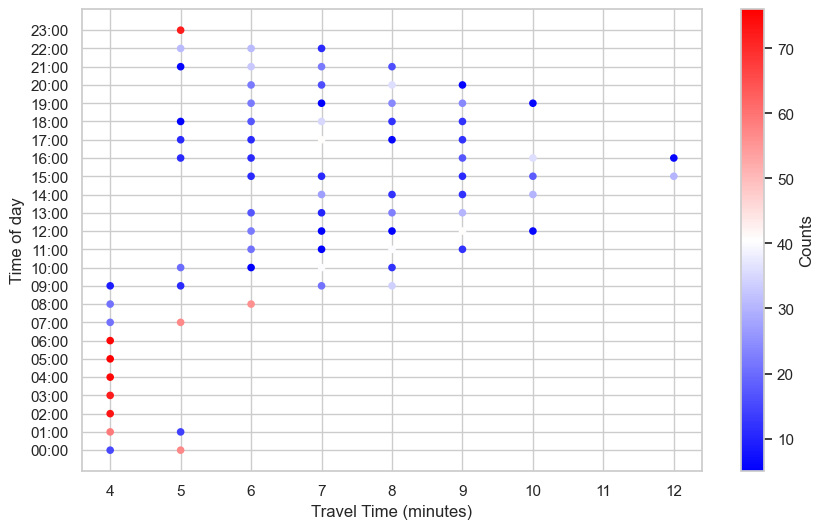

In [57]:
# Extract data for the scatter plot
duration_values = grouped['duration(minutes)']
hours_of_the_day = grouped['hour']
counts = grouped['count']

# Create a scatter plot with counts as color-coding
plt.figure(figsize=(10, 6))
sc = plt.scatter(duration_values, hours_of_the_day, c=counts, s=20, cmap='bwr', alpha=1)
plt.xlabel('Travel Time (minutes)')
plt.ylabel('Time of day')

# Set y-axis ticks to display hours in hour format
hour_labels = [f'{hour:02}:00' for hour in range(24)]
plt.yticks(range(24), hour_labels)

# Add a color bar to show the scale
cbar = plt.colorbar(sc)
cbar.set_label('Counts')

# Add a grid 
plt.grid(True)

# Save the plot as an image
plt.savefig('Hour of the day.png')

# Display the plot
plt.show()